In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#m = no of training examples (no of rows of feature matrix)
#n = no of features (no of columns of feature matrix)
#x’s = input variables / independent variables / features
#y’s = output variables / dependent variables / target

In [3]:
df = pd.read_csv(r'E:\Data\Databeat\Wine qual\winequality-red.csv', sep = ';')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
for col in df.columns:
    print('{} has {}% of Null Values i.e. has {} Null values'.format(col, (df[col].isnull().sum()*100/len(df)), df[col].isnull().sum()))

fixed acidity has 0.0% of Null Values i.e. has 0 Null values
volatile acidity has 0.0% of Null Values i.e. has 0 Null values
citric acid has 0.0% of Null Values i.e. has 0 Null values
residual sugar has 0.0% of Null Values i.e. has 0 Null values
chlorides has 0.0% of Null Values i.e. has 0 Null values
free sulfur dioxide has 0.0% of Null Values i.e. has 0 Null values
total sulfur dioxide has 0.0% of Null Values i.e. has 0 Null values
density has 0.0% of Null Values i.e. has 0 Null values
pH has 0.0% of Null Values i.e. has 0 Null values
sulphates has 0.0% of Null Values i.e. has 0 Null values
alcohol has 0.0% of Null Values i.e. has 0 Null values
quality has 0.0% of Null Values i.e. has 0 Null values


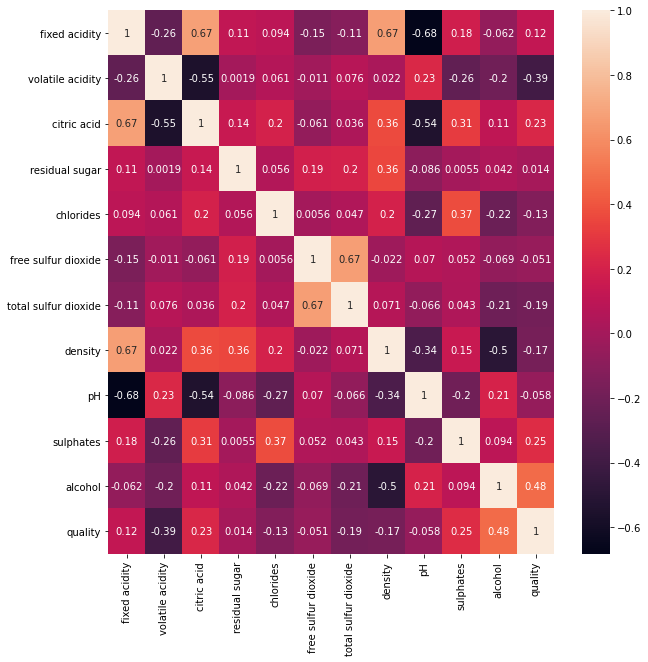

In [30]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [5]:
df.shape

(1599, 12)

In [6]:
X = df.values[:,0:11]
X

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

In [7]:
y = df.values[:,11]
y

array([5., 5., 5., ..., 6., 5., 6.])

In [8]:
def custom_train_test_split(X, y, test_size):
    split = int(np.round(test_size*len(X)))
    X_train, X_test = X[:split, :], X[split:, :]
    y_train, y_test = y[:split], y[split:]
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, 0.2)

### Performing Normalization

In [10]:
def normalize_data(X):
    X_norm = X.copy()
    min_X = np.min(X, axis = 0)
    max_X = np.max(X, axis = 0)
    X_norm = (X-min_X)/(max_X - min_X)
    return X_norm

In [11]:
X_norm_train = normalize_data(X_train)

In [12]:
def add_bias(X, y):
    m = len(y)
    X = np.hstack((np.ones((m,1)), X))
    return X

In [13]:
X_norm_train = add_bias(X_norm_train, y_train)

In [14]:
X_norm_train[:5]

array([[1.        , 0.26923077, 0.45217391, 0.        , 0.07368421,
        0.06468531, 0.16326531, 0.17931034, 0.63265306, 0.6637931 ,
        0.13772455, 0.08      ],
       [1.        , 0.30769231, 0.60869565, 0.        , 0.14736842,
        0.10314685, 0.44897959, 0.40689655, 0.53061224, 0.39655172,
        0.20958084, 0.16      ],
       [1.        , 0.30769231, 0.50434783, 0.04      , 0.11578947,
        0.09265734, 0.24489796, 0.31724138, 0.55102041, 0.44827586,
        0.19161677, 0.16      ],
       [1.        , 0.63461538, 0.08695652, 0.56      , 0.07368421,
        0.06293706, 0.28571429, 0.35862069, 0.65306122, 0.36206897,
        0.1497006 , 0.16      ],
       [1.        , 0.26923077, 0.45217391, 0.        , 0.07368421,
        0.06468531, 0.16326531, 0.17931034, 0.63265306, 0.6637931 ,
        0.13772455, 0.08      ]])

In [15]:
n = X_norm_train.shape[1]
n
# Random initialization of weights as 0
theta = np.zeros(n)

In [16]:
def calc_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqr_of_Errors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqr_of_Errors)
    return J

In [17]:
def gradient_desc(X, y, theta, lr, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (lr / m) * X.transpose().dot(errors);
        theta = theta - sum_delta
        cost_history[i] = calc_cost(X, y, theta) 

    return theta, cost_history

In [18]:
iterations = 400
lr = 0.15
theta, cost_history = gradient_desc(X_norm_train, y_train, theta, lr, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 3.64371088  1.24155811 -0.32926793  0.22102337 -0.0970193  -0.08739475
  0.05669806 -0.41772333  0.86976771  1.45747862  0.61217871  1.21065682]
cost_history = [7.15308161 3.51788317 1.82703363 1.03984647 0.67266374 0.50070555
 0.41950517 0.38051124 0.36115897 0.35096081 0.34504208 0.34113672
 0.33819101 0.33571468 0.33347935 0.33137833 0.32936156 0.32740524
 0.32549784 0.32363351 0.32180907 0.32002259 0.31827272 0.31655841
 0.31487874 0.31323287 0.31162    0.31003937 0.30849025 0.3069719
 0.30548364 0.30402476 0.30259462 0.30119254 0.2998179  0.29847008
 0.29714845 0.29585245 0.29458147 0.29333496 0.29211237 0.29091316
 0.28973679 0.28858277 0.28745057 0.28633972 0.28524973 0.28418015
 0.2831305  0.28210035 0.28108925 0.2800968  0.27912256 0.27816613
 0.27722713 0.27630515 0.27539983 0.2745108  0.27363769 0.27278015
 0.27193784 0.27111043 0.27029758 0.26949898 0.26871432 0.26794328
 0.26718557 0.26644091 0.26570899 0.26498956 0.26428233 0.26358704
 0.26290343 

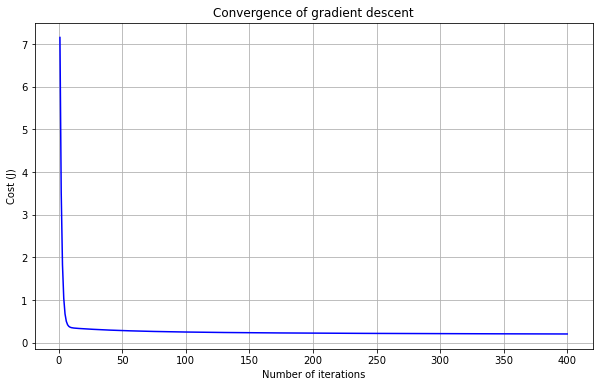

In [25]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')
plt.show()

In [20]:
def make_pred(X, y, theta):
    X_norm_test = normalize_data(X)
    X_norm_test = add_bias(X_norm_test, y)
    y_pred = np.dot(X_norm_test, np.round(theta, 3))
    dic = {'Real':y.flatten(), 'Predicted': y_pred.flatten()}
    return pd.DataFrame(dic), y_pred

In [21]:
result,y_pred = make_pred(X_test, y_test, theta)

In [22]:
result.shape[0]

1279

In [23]:
def accuracy(y_test, y_pred):
    a = len(y_test)
    accuracy = (np.sum(np.abs(y_test-y_pred)))/a
    return accuracy

In [24]:
accuracy(y_test, y_pred)

0.6125919638870799